Parkinson Disease Analysis

In [2]:
Subject: Integer that uniquely identifies each subject 
Age: Subject age
Sex: Subject gender ‘0’ - male, ‘1’ - female
Test_time: Time since recruitment into the trial. The integer part is the number of days since recruitment
Motor_UPDRS: Clinician’s motor UPDRS score, linearly interpolated
Total_UPDRS: Clinician’s total UPDRS score, linearly interpolated
Jitter (%), Jitter(Abs), Jitter. RAP, Jitter. PPQ5, Jitter. DDP: Several measures of variation in fundamental frequency (Frequency parameters)
Shimmer, Shimmer (dB), Shimmer. APQ3, Shimmer. APQ5, Shimmer. APQ11, Shimmer. DDA: Several measures of variation in amplitude (Amplitude parameters)
NHR, HNR: Two measures of ratio of noise to tonal components in the voice
RPDE: A nonlinear dynamical complexity measure
DFA: Signal fractal scaling exponent
PPE: A nonlinear measure of fundamental frequency variation

SyntaxError: invalid syntax (2115120799.py, line 1)

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
# Read data set 
data = pd.read_csv("parkinsons_updrs.csv")

# Check shape
data.shape

(5875, 22)

In [2]:
data.head()

,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,1,72,0,5.6431,28.199,34.398,0.00662,0.000034,0.00401,0.00317,...,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006
1,1,72,0,12.6660,28.447,34.894,0.00300,0.000017,0.00132,0.00150,...,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810
2,1,72,0,19.6810,28.695,35.389,0.00481,0.000025,0.00205,0.00208,...,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014
3,1,72,0,25.6470,28.905,35.810,0.00528,0.000027,0.00191,0.00264,...,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277
4,1,72,0,33.6420,29.187,36.375,0.00335,0.000020,0.00093,0.00130,...,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5875 entries, 0 to 5874
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   subject#       5875 non-null   int64  
 1   age            5875 non-null   int64  
 2   sex            5875 non-null   int64  
 3   test_time      5875 non-null   float64
 4   motor_UPDRS    5875 non-null   float64
 5   total_UPDRS    5875 non-null   float64
 6   Jitter(%)      5875 non-null   float64
 7   Jitter(Abs)    5875 non-null   float64
 8   Jitter:RAP     5875 non-null   float64
 9   Jitter:PPQ5    5875 non-null   float64
 10  Jitter:DDP     5875 non-null   float64
 11  Shimmer        5875 non-null   float64
 12  Shimmer(dB)    5875 non-null   float64
 13  Shimmer:APQ3   5875 non-null   float64
 14  Shimmer:APQ5   5875 non-null   float64
 15  Shimmer:APQ11  5875 non-null   float64
 16  Shimmer:DDA    5875 non-null   float64
 17  NHR            5875 non-null   float64
 18  HNR     

In [3]:
data.corr()

,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
subject#,1.000000,-0.030864,0.286851,-0.000882,0.252919,0.253643,0.135448,0.075156,0.120339,0.136474,...,0.142864,0.112950,0.138264,0.173333,0.112949,0.168743,-0.206929,0.147300,0.097464,0.157559
age,-0.030864,1.000000,-0.041602,0.019884,0.273665,0.310290,0.023071,0.035691,0.010255,0.013199,...,0.111130,0.098912,0.089983,0.135238,0.098913,0.007093,-0.104842,0.090208,-0.092870,0.120790
sex,0.286851,-0.041602,1.000000,-0.009805,-0.031205,-0.096559,0.051422,-0.154645,0.076718,0.087995,...,0.056481,0.044937,0.064819,0.023360,0.044938,0.168170,-0.000167,-0.159262,-0.165113,-0.099901
test_time,-0.000882,0.019884,-0.009805,1.000000,0.067918,0.075263,-0.022837,-0.011365,-0.028888,-0.023290,...,-0.030962,-0.029020,-0.036504,-0.039110,-0.029017,-0.026357,0.036545,-0.038887,0.019261,-0.000563
motor_UPDRS,0.252919,0.273665,-0.031205,0.067918,1.000000,0.947231,0.084816,0.050903,0.072684,0.076291,...,0.110076,0.084261,0.092105,0.136560,0.084260,0.074967,-0.157029,0.128607,-0.116242,0.162433
total_UPDRS,0.253643,0.310290,-0.096559,0.075263,0.947231,1.000000,0.074247,0.066927,0.064015,0.063352,...,0.098790,0.079363,0.083467,0.120838,0.079363,0.060952,-0.162117,0.156897,-0.113475,0.156195
Jitter(%),0.135448,0.023071,0.051422,-0.022837,0.084816,0.074247,1.000000,0.865577,0.984181,0.968214,...,0.716704,0.664149,0.694002,0.645965,0.664147,0.825294,-0.675188,0.427128,0.226550,0.721849
Jitter(Abs),0.075156,0.035691,-0.154645,-0.011365,0.050903,0.066927,0.865577,1.000000,0.844626,0.790538,...,0.655871,0.623830,0.621401,0.589998,0.623827,0.699960,-0.706418,0.547100,0.352264,0.787853
Jitter:RAP,0.120339,0.010255,0.076718,-0.028888,0.072684,0.064015,0.984181,0.844626,1.000000,0.947196,...,0.685551,0.650226,0.659831,0.603082,0.650225,0.792373,-0.641473,0.382891,0.214881,0.670652
Jitter:PPQ5,0.136474,0.013199,0.087995,-0.023290,0.076291,0.063352,0.968214,0.790538,0.947196,1.000000,...,0.734591,0.676711,0.734021,0.668413,0.676710,0.864864,-0.662409,0.381503,0.175359,0.663491


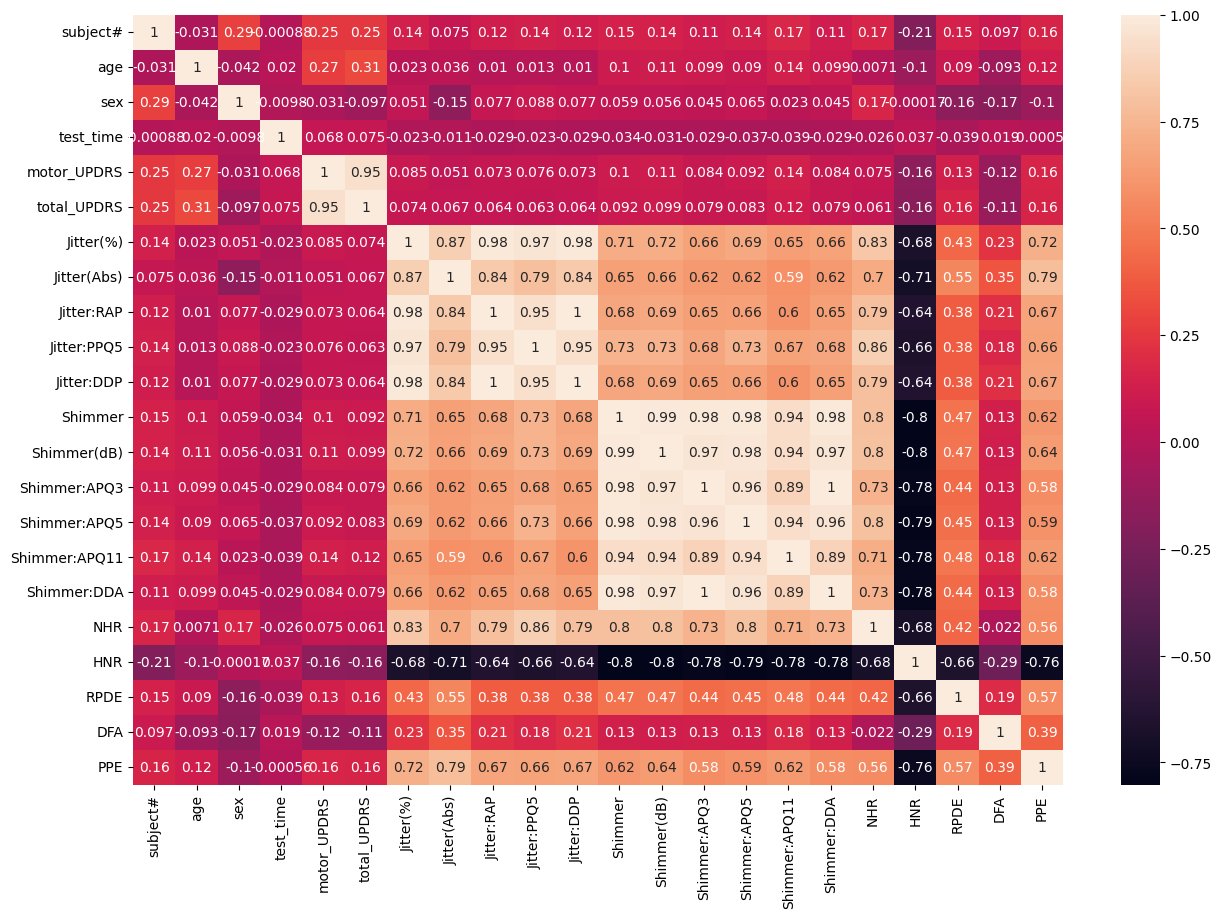

In [4]:
plt.figure(figsize=(15, 10))
sns.heatmap(data.corr(), annot=True)
plt.show()

<AxesSubplot:>

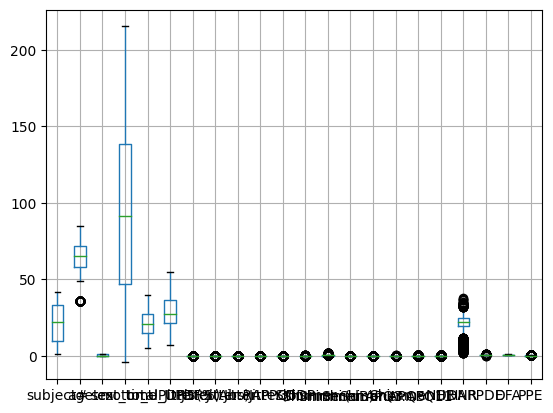

In [3]:
data.boxplot()

In [5]:
data.describe()

,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
count,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,...,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000
mean,21.494128,64.804936,0.317787,92.863722,21.296229,29.018942,0.006154,0.000044,0.002987,0.003277,...,0.310960,0.017156,0.020144,0.027481,0.051467,0.032120,21.679495,0.541473,0.653240,0.219589
std,12.372279,8.821524,0.465656,53.445602,8.129282,10.700283,0.005624,0.000036,0.003124,0.003732,...,0.230254,0.013237,0.016664,0.019986,0.039711,0.059692,4.291096,0.100986,0.070902,0.091498
min,1.000000,36.000000,0.000000,-4.262500,5.037700,7.000000,0.000830,0.000002,0.000330,0.000430,...,0.026000,0.001610,0.001940,0.002490,0.004840,0.000286,1.659000,0.151020,0.514040,0.021983
25%,10.000000,58.000000,0.000000,46.847500,15.000000,21.371000,0.003580,0.000022,0.001580,0.001820,...,0.175000,0.009280,0.010790,0.015665,0.027830,0.010955,19.406000,0.469785,0.596180,0.156340
50%,22.000000,65.000000,0.000000,91.523000,20.871000,27.576000,0.004900,0.000035,0.002250,0.002490,...,0.253000,0.013700,0.015940,0.022710,0.041110,0.018448,21.920000,0.542250,0.643600,0.205500
75%,33.000000,72.000000,1.000000,138.445000,27.596500,36.399000,0.006800,0.000053,0.003290,0.003460,...,0.365000,0.020575,0.023755,0.032715,0.061735,0.031463,24.444000,0.614045,0.711335,0.264490
max,42.000000,85.000000,1.000000,215.490000,39.511000,54.992000,0.099990,0.000446,0.057540,0.069560,...,2.107000,0.162670,0.167020,0.275460,0.488020,0.748260,37.875000,0.966080,0.865600,0.731730


In [17]:
 X = pd.DataFrame(data.iloc[:,:-1])
 y = pd.DataFrame(data.iloc[:,-1]) 

In [18]:
X.head(n=5)

,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,...,Shimmer,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA
0,1,72,0,5.6431,28.199,34.398,0.00662,0.000034,0.00401,0.00317,...,0.02565,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842
1,1,72,0,12.6660,28.447,34.894,0.00300,0.000017,0.00132,0.00150,...,0.02024,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477
2,1,72,0,19.6810,28.695,35.389,0.00481,0.000025,0.00205,0.00208,...,0.01675,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405
3,1,72,0,25.6470,28.905,35.810,0.00528,0.000027,0.00191,0.00264,...,0.02309,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794
4,1,72,0,33.6420,29.187,36.375,0.00335,0.000020,0.00093,0.00130,...,0.01703,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122


In [19]:
y.head(n=5)

,PPE
0,0.16006
1,0.10810
2,0.21014
3,0.33277
4,0.19361


In [15]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 1)

In [16]:
print("X Train shape ", X_train.shape)
print("X Test shape  ", X_test.shape)
print("y Train shape ", y_train.shape)
print("y Test shape  ", y_test.shape)

X Train shape  (4700, 20)
X Test shape   (1175, 20)
y Train shape  (4700, 1)
y Test shape   (1175, 1)


In [17]:
from sklearn.linear_model import LinearRegression 

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [18]:
regressor.coef_

array([[ 2.59850387e-01,  3.08180940e-01, -4.91211459e+00,
         1.45331003e-02, -3.85496783e+02, -4.35705734e+04,
        -6.61506465e+04, -1.23786355e+02,  2.24947274e+04,
         3.78373564e+01, -7.95240976e-01,  7.86346169e+03,
         2.07732319e+01,  1.40170157e+01, -2.67528530e+03,
        -2.27121970e+01, -4.88597506e-01,  1.11640607e+00,
        -3.57353024e+01,  1.54085292e+01]])

In [19]:
v = pd.DataFrame(regressor.coef_, index = ["Co-efficient"]).transpose()
w = pd.DataFrame(X.columns,columns = ['Attribute'])

In [20]:
coeff_df = pd.concat([w,v], axis = 1, join = 'inner')
coeff_df

,Attribute,Co-efficient
0,subject#,0.259850
1,age,0.308181
2,sex,-4.912115
3,test_time,0.014533
4,Jitter(%),-385.496783
5,Jitter(Abs),-43570.573402
6,Jitter:RAP,-66150.646550
7,Jitter:PPQ5,-123.786355
8,Jitter:DDP,22494.727442
9,Shimmer,37.837356


In [21]:
y_test.head(n=10)

,total_UPDRS
2667,26.230
2560,26.230
2098,20.867
642,44.503
552,15.264
1777,31.936
1081,24.702
1501,21.323
5707,42.401
2353,36.022


In [22]:
y_pred  = regressor.predict(X_test)
y_pred = pd.DataFrame(y_pred,columns = ['Predicted'])
y_pred.head(n=10)

,Predicted
0,26.238423
1,30.314382
2,27.167150
3,29.374134
4,30.590497
5,27.541697
6,24.147979
7,26.136897
8,32.442921
9,23.496818


In [23]:
from sklearn import metrics 
import numpy as np
print("Mean Absolute Error", metrics.mean_absolute_error(y_test,y_pred))
print("Mean Squared Error", metrics.mean_squared_error(y_test,y_pred))
print("Root Mean Squared  Error", np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print("R Squared", metrics.r2_score(y_test,y_pred))

Mean Absolute Error 7.759655268485181
Mean Squared Error 89.27805504319426
Root Mean Squared  Error 9.448706527519747
R Squared 0.2610396973037986


In [24]:
import statsmodels.api as sm

In [25]:
ols_model = sm.OLS(y_train,X_train)
ols_results = ols_model.fit()

In [26]:
print(ols_results.summary())

                                 OLS Regression Results                                
Dep. Variable:            total_UPDRS   R-squared (uncentered):                   0.909
Model:                            OLS   Adj. R-squared (uncentered):              0.909
Method:                 Least Squares   F-statistic:                              2340.
Date:                Sat, 18 Mar 2023   Prob (F-statistic):                        0.00
Time:                        10:07:24   Log-Likelihood:                         -17155.
No. Observations:                4700   AIC:                                  3.435e+04
Df Residuals:                    4680   BIC:                                  3.448e+04
Df Model:                          20                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

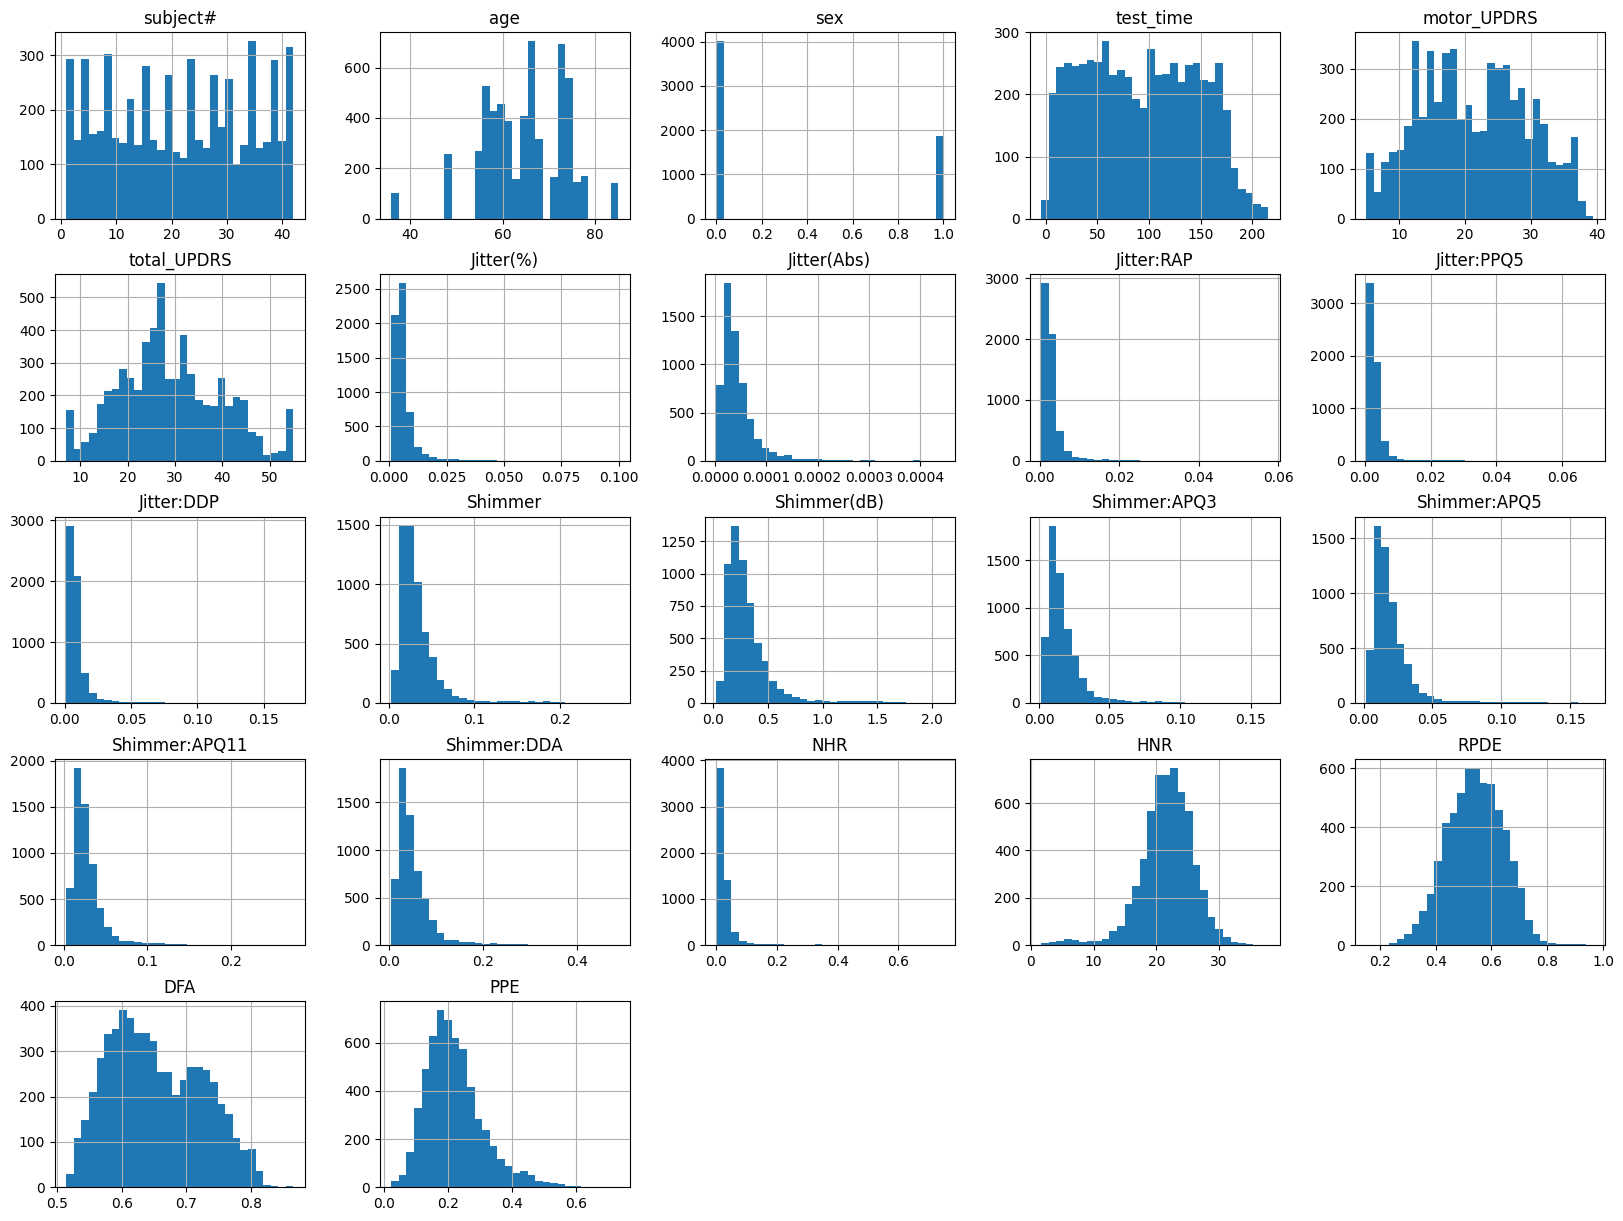

In [6]:
data.hist(bins=30, figsize=(20,15))
plt.show()